***Importing and Reading the Data***

In [1]:
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import preprocessing
from sklearn import metrics
import random
import warnings
warnings.filterwarnings('ignore')

# Path to the Parquet file
parquet_file = '0000 (1).parquet'

# Read the Parquet file into a PyArrow Table
table = pq.read_table(parquet_file)

# Converted PyArrow Table to a Pandas DataFrame
import pandas as pd

df = table.to_pandas()
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

***Data Preprocessing***

In [2]:
# Dropped column 'Unnamed: 0' using drop() method
df.drop('Unnamed: 0', axis=1, inplace=True)  # axis=1 specifies that it's a column operation
df.head()

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [5]:
df.describe()

popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  114000.000000   114000.000000  
mean      122.147837        3.904035  
std        29.978197        0.432621  
min         0.000000        0.000000  
25%        99.218750        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

***Finding only the unique values based on the column 'track_name' and removing the duplicate values***

In [6]:
track_count=len(df['track_name'].unique())
print("Unique Track Name Values:",track_count)

duplicate_rows = len(df[df.duplicated(['track_name'])])
print("Duplicate Track Name Values:",duplicate_rows)





Unique Track Name Values: 73609
Duplicate Track Name Values: 40391


In [7]:
df = df.drop_duplicates(subset=['track_name'])
df.shape

(73609, 20)

In [8]:
genres = df['track_genre'].unique()
len(genres)

113

In [9]:
genres

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [10]:
genre_counts =df['track_genre'].value_counts()
# pd.set_option('display.max_rows', None)
genre_counts

track_genre
black-metal    981
comedy         965
afrobeat       945
heavy-metal    944
cantopop       935
              ... 
reggae         142
rock           116
house           98
indie           93
reggaeton       56
Name: count, Length: 113, dtype: int64

***Plotting the graph to the Genre count of each Genre***

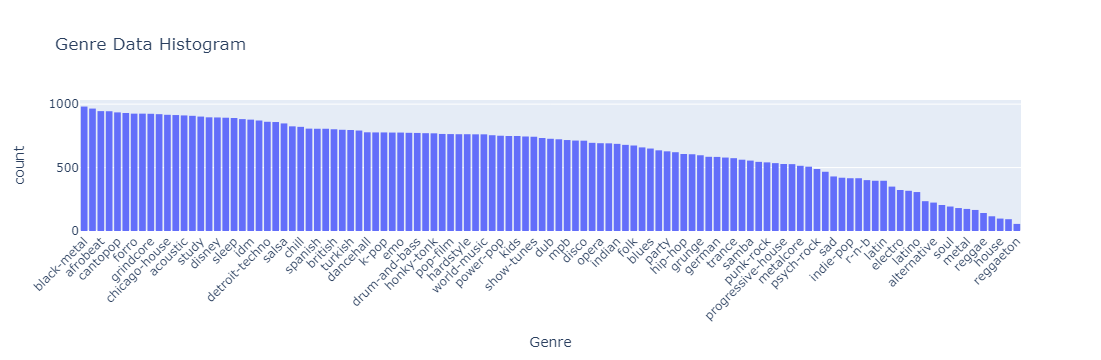

In [11]:
# Genre Data Histogram
fig = px.histogram(df, x='track_genre', 
                   title='Genre Data Histogram',
                   labels={'track_genre': 'Genre', 'count': 'Count'},
                   category_orders={'track_genre': df['track_genre'].value_counts().index},
                   color_discrete_sequence=['#636EFA'])
fig.update_layout(xaxis_tickangle=-45)  
fig.show()



***DATA VISUALISATION WITH EACH  GENRE***

In [12]:
def create_genre_boxplot(data, title):
    fig = px.box(data, x='track_genre', y='danceability', title=title, 
                 labels={'track_genre': 'Genre', 'danceability': 'Danceability'},
                color='track_genre')
    fig.update_layout(xaxis_tickangle=-45)  
    fig.show()

# Splitting genres into four equal parts
mark = len(genres) // 4
genres1 = genres[ : mark]
genres2 = genres[mark : 2*mark]
genres3 = genres[2*mark : 3*mark]
genres4 = genres[3*mark : 4*mark]

subset1 = df[df['track_genre'].isin(genres1)]
create_genre_boxplot(subset1, 'Danceability vs Genres Division1')

subset2 = df[df['track_genre'].isin(genres2)]
create_genre_boxplot(subset2, 'Danceability vs Genres Division2')

subset3 = df[df['track_genre'].isin(genres3)]
create_genre_boxplot(subset3, 'Danceability vs Genres Division3')

subset4 = df[df['track_genre'].isin(genres4)]
create_genre_boxplot(subset4, 'Danceability vs Genres Division4')

***Energy with respect to each Genre to understand the data to a greater extent***

In [13]:
def create_genre_boxplot(data, title):
    fig = px.box(data, x='track_genre', y='energy', title=title, 
                 labels={'track_genre': 'Genre', 'energy': 'Energy'},
                color='track_genre')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

# Splitting genres into four equal parts
mark = len(genres) // 4
genres1 = genres[ : mark]
genres2 = genres[mark : 2*mark]
genres3 = genres[2*mark : 3*mark]
genres4 = genres[3*mark : 4*mark]

subset1 = df[df['track_genre'].isin(genres1)]
create_genre_boxplot(subset1, 'Energy vs Genres Division1')

subset2 = df[df['track_genre'].isin(genres2)]
create_genre_boxplot(subset2, 'Energy vs Genres Division2')

subset3 = df[df['track_genre'].isin(genres3)]
create_genre_boxplot(subset3, 'Energy vs Genres Division3')

subset4 = df[df['track_genre'].isin(genres4)]
create_genre_boxplot(subset4, 'Energy vs Genres Division4')

***Handling some data in 'instrumentalness' column to make our data more refined***

In [14]:
count = df["instrumentalness"].value_counts()[0]
print(count)

# Replacing '0' values with mean
df['instrumentalness'] = df['instrumentalness'].replace(0, df['instrumentalness'].mean())

23777


***Dropping the irrelevant columns which are not required in our Target Variable (track_genre) prediction***

In [15]:
df = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'time_signature'], axis =1)

# Renaming a column
df.rename(columns={'track_genre': 'genre'}, inplace=True)
df


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113994         0.331  0.1710    1   -15.668     1       0.0350        0.9200   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo        genre  
0               0.000001    0.3580   0.7150   87.917     acoustic  
1               0.000006    0.1010   0.2670   77.489     acoustic  
2               0.184374    0.1170   0.1200   76.332     acoustic  
3               0.000071    0.1320   0.1430  181.740     acoustic  
4               0.184374    0.0829   0.1670  119.949     acoustic  
...                  ...       ...      ...      ...          ...  
113994          0.022900    0.0679   0.3270  132.147  world-music  
113995          0.928000    0.0863   0.0339  125.995  world-music  
113996          0.976000    0.1050   0.0350   85.239  world-music  
113997          0.184374    0.0839   0.7430  132.378  world-music  
113999          0.184374    0.0893   0.7080   79.198  world-music  

[73609 rows x 12 columns]

***Dropping genres which are less in counts in 'track_genre' column, as seen above in the graph***

In [16]:
df.drop(df.loc[df['genre']=="alternative"].index, inplace=True)
df.drop(df.loc[df['genre']=="dubstep"].index, inplace=True)
df.drop(df.loc[df['genre']=="house"].index, inplace=True)
df.drop(df.loc[df['genre']=="indie"].index, inplace=True)
df.drop(df.loc[df['genre']=="jazz"].index, inplace=True)
df.drop(df.loc[df['genre']=="metal"].index, inplace=True)
df.drop(df.loc[df['genre']=="pop"].index, inplace=True)
df.drop(df.loc[df['genre']=="punk"].index, inplace=True)
df.drop(df.loc[df['genre']=="reggae"].index, inplace=True)
df.drop(df.loc[df['genre']=="reggaeton"].index, inplace=True)
df.drop(df.loc[df['genre']=="rock"].index, inplace=True)
df.drop(df.loc[df['genre']=="soul"].index, inplace=True)

df = df.reset_index(drop = True)

***These are the final set of Genres after dropping some of them above***

In [17]:
x = df.loc[:,:"tempo"]
y = df["genre"]
y.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'ambient', 'anime',
       'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat',
       'british', 'cantopop', 'chicago-house', 'children', 'chill',
       'classical', 'club', 'comedy', 'country', 'dance', 'dancehall',
       'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney',
       'drum-and-bass', 'dub', 'edm', 'electro', 'electronic', 'emo',
       'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel',
       'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy',
       'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop',
       'honky-tonk', 'idm', 'indian', 'indie-pop', 'industrial',
       'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'k-pop', 'kids',
       'latin', 'latino', 'malay', 'mandopop', 'metalcore',
       'minimal-techno', 'mpb', 'new-age', 'opera', 'pagode', 'party',
       'piano', 'pop-film', 'power-pop', 'progressive-house',
       'psych-rock', 'punk-rock', 'r-n-b', 'r

***Checking Data for skewness***

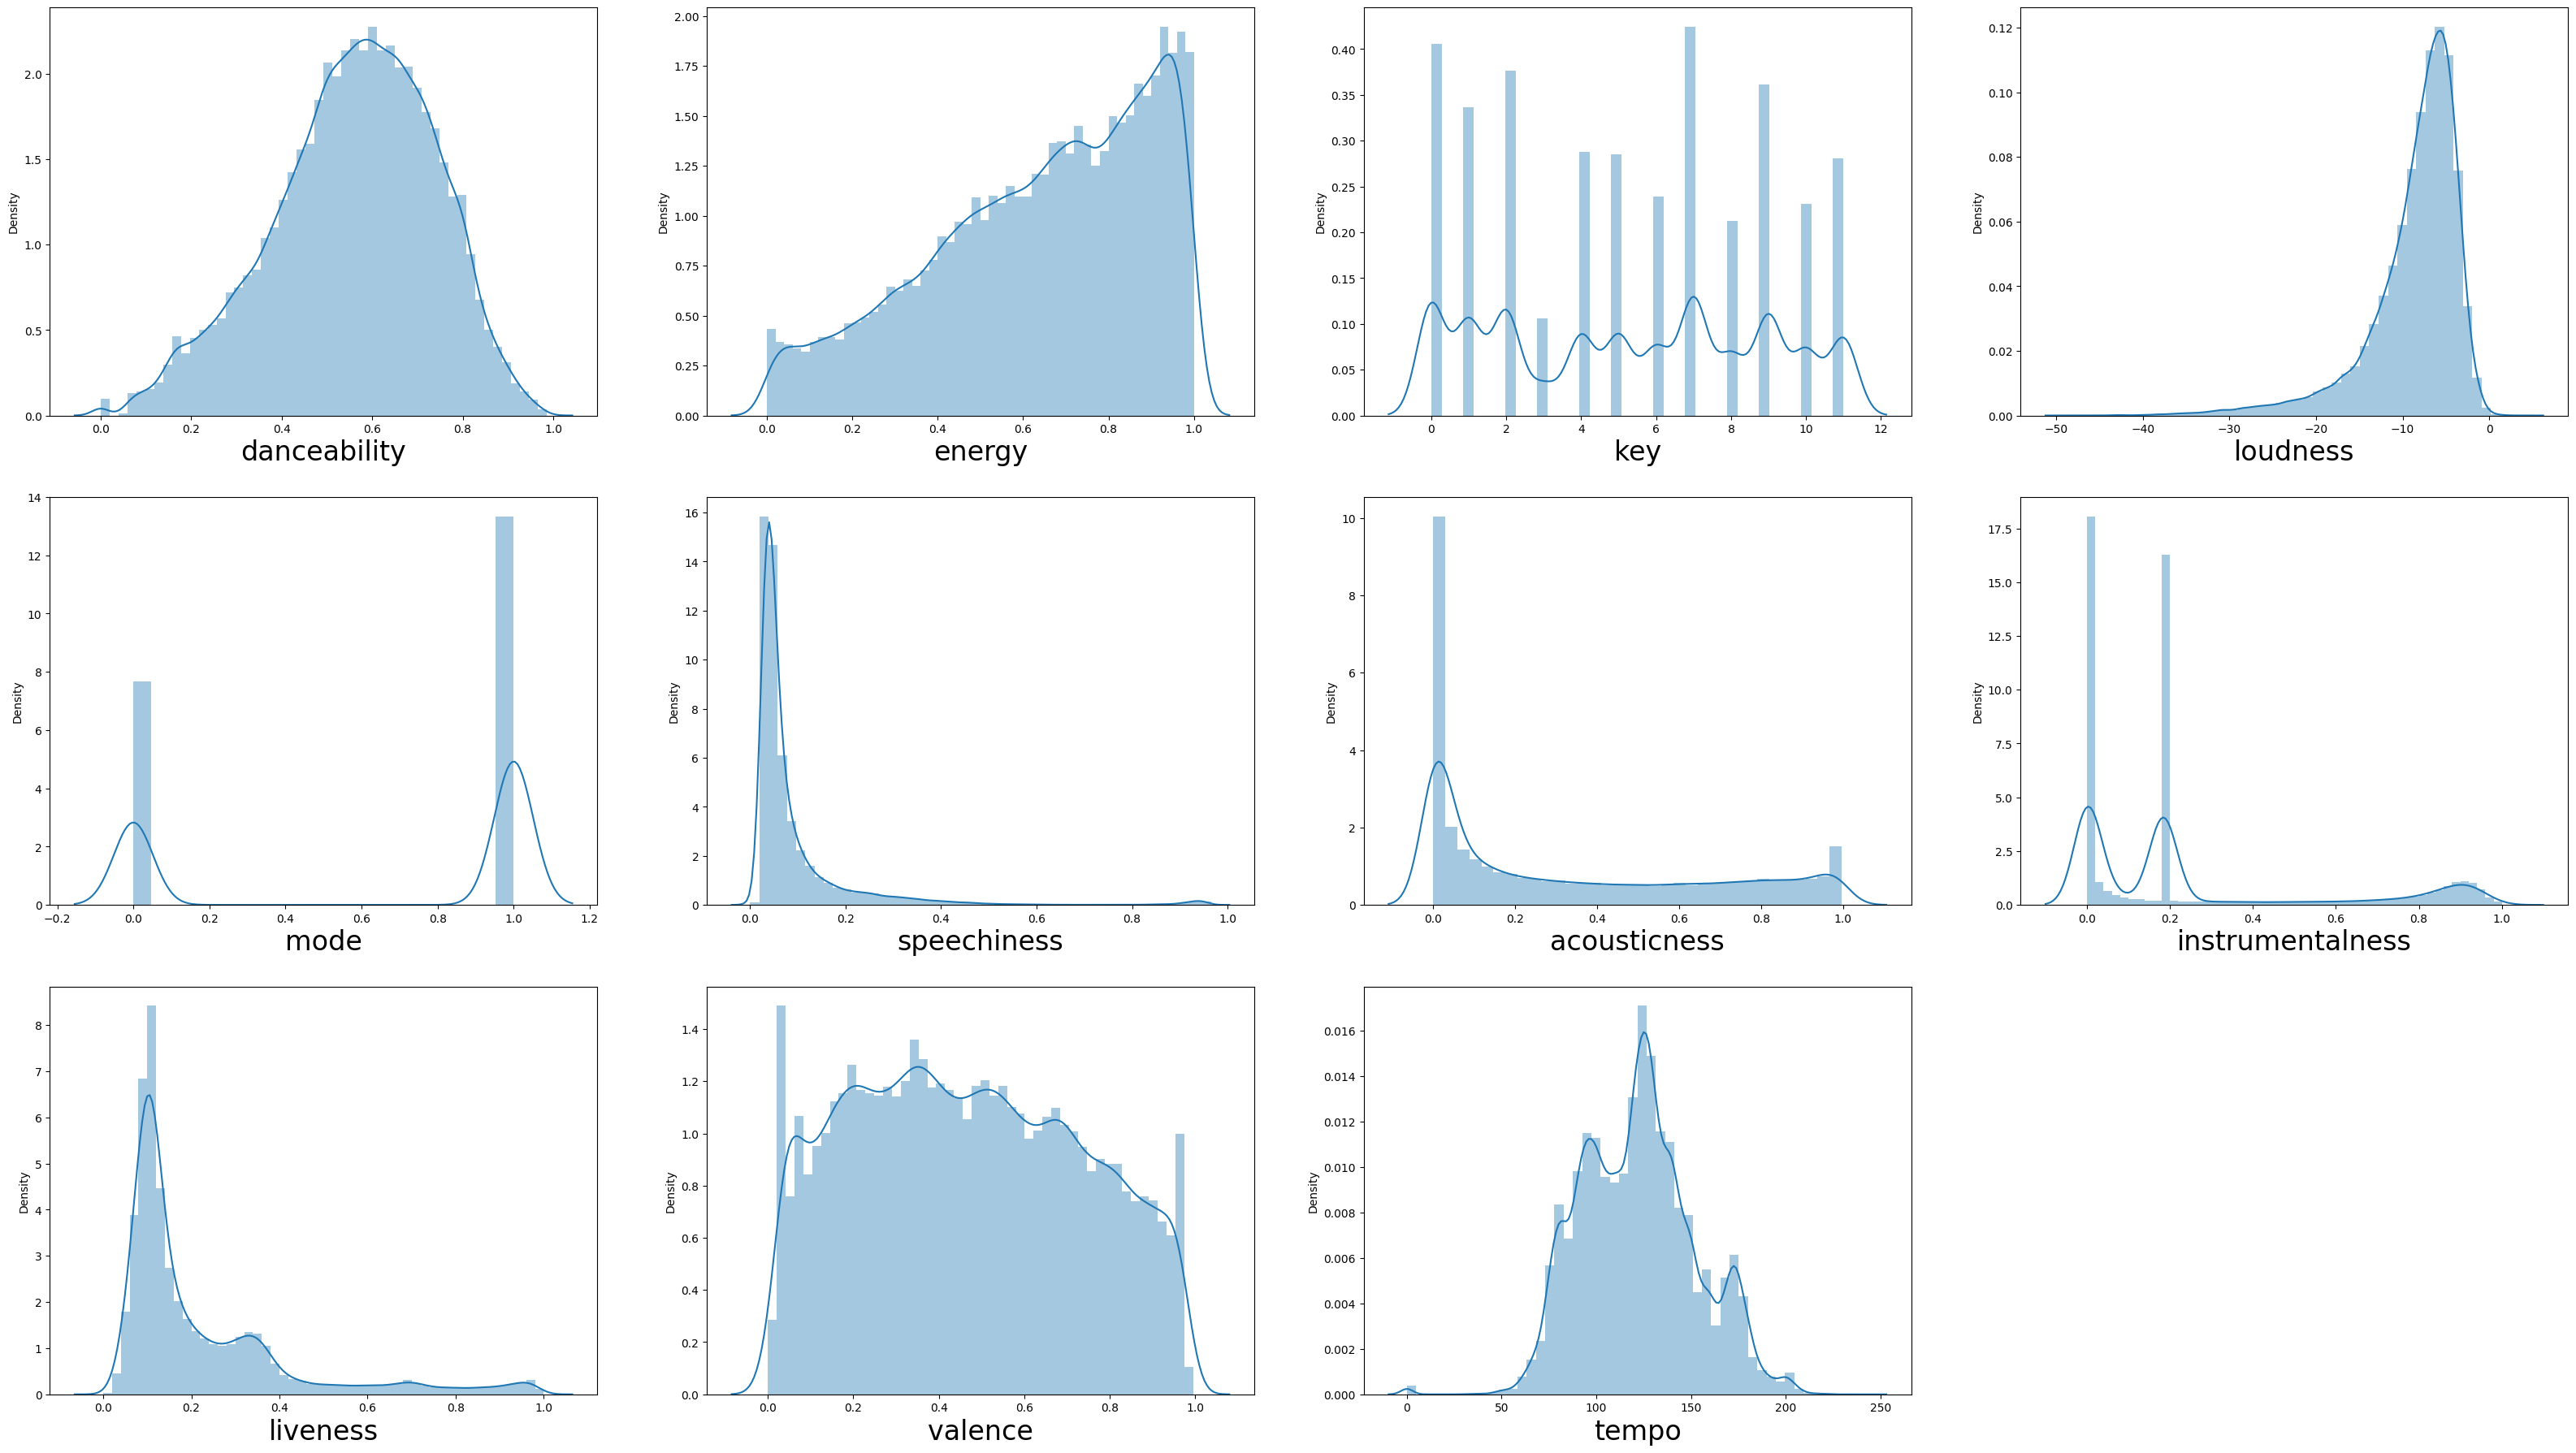

In [18]:
k=0
plt.figure(figsize = (40,30))
for i in x.columns:
    plt.subplot(4,4, k + 1)
    sns.distplot(x[i])
    plt.xlabel(i, fontsize=24)
    k +=1

***Handling Skewness***

In [19]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

transformed_feature = pt.fit_transform(df[['speechiness']])
df['speechiness'] = transformed_feature

transformed_feature = pt.fit_transform(df[['acousticness']])
df['acousticness'] = transformed_feature

transformed_feature = pt.fit_transform(df[['instrumentalness']])
df['instrumentalness'] = transformed_feature

transformed_feature = pt.fit_transform(df[['liveness']])
df['liveness'] = transformed_feature

offset = 0.1
df.loc[df['energy'] > 0, 'energy'] = np.arcsin(df.loc[df['energy'] > 0, 'energy'])

In [20]:
x = df.loc[:,:"tempo"]
y = df["genre"]

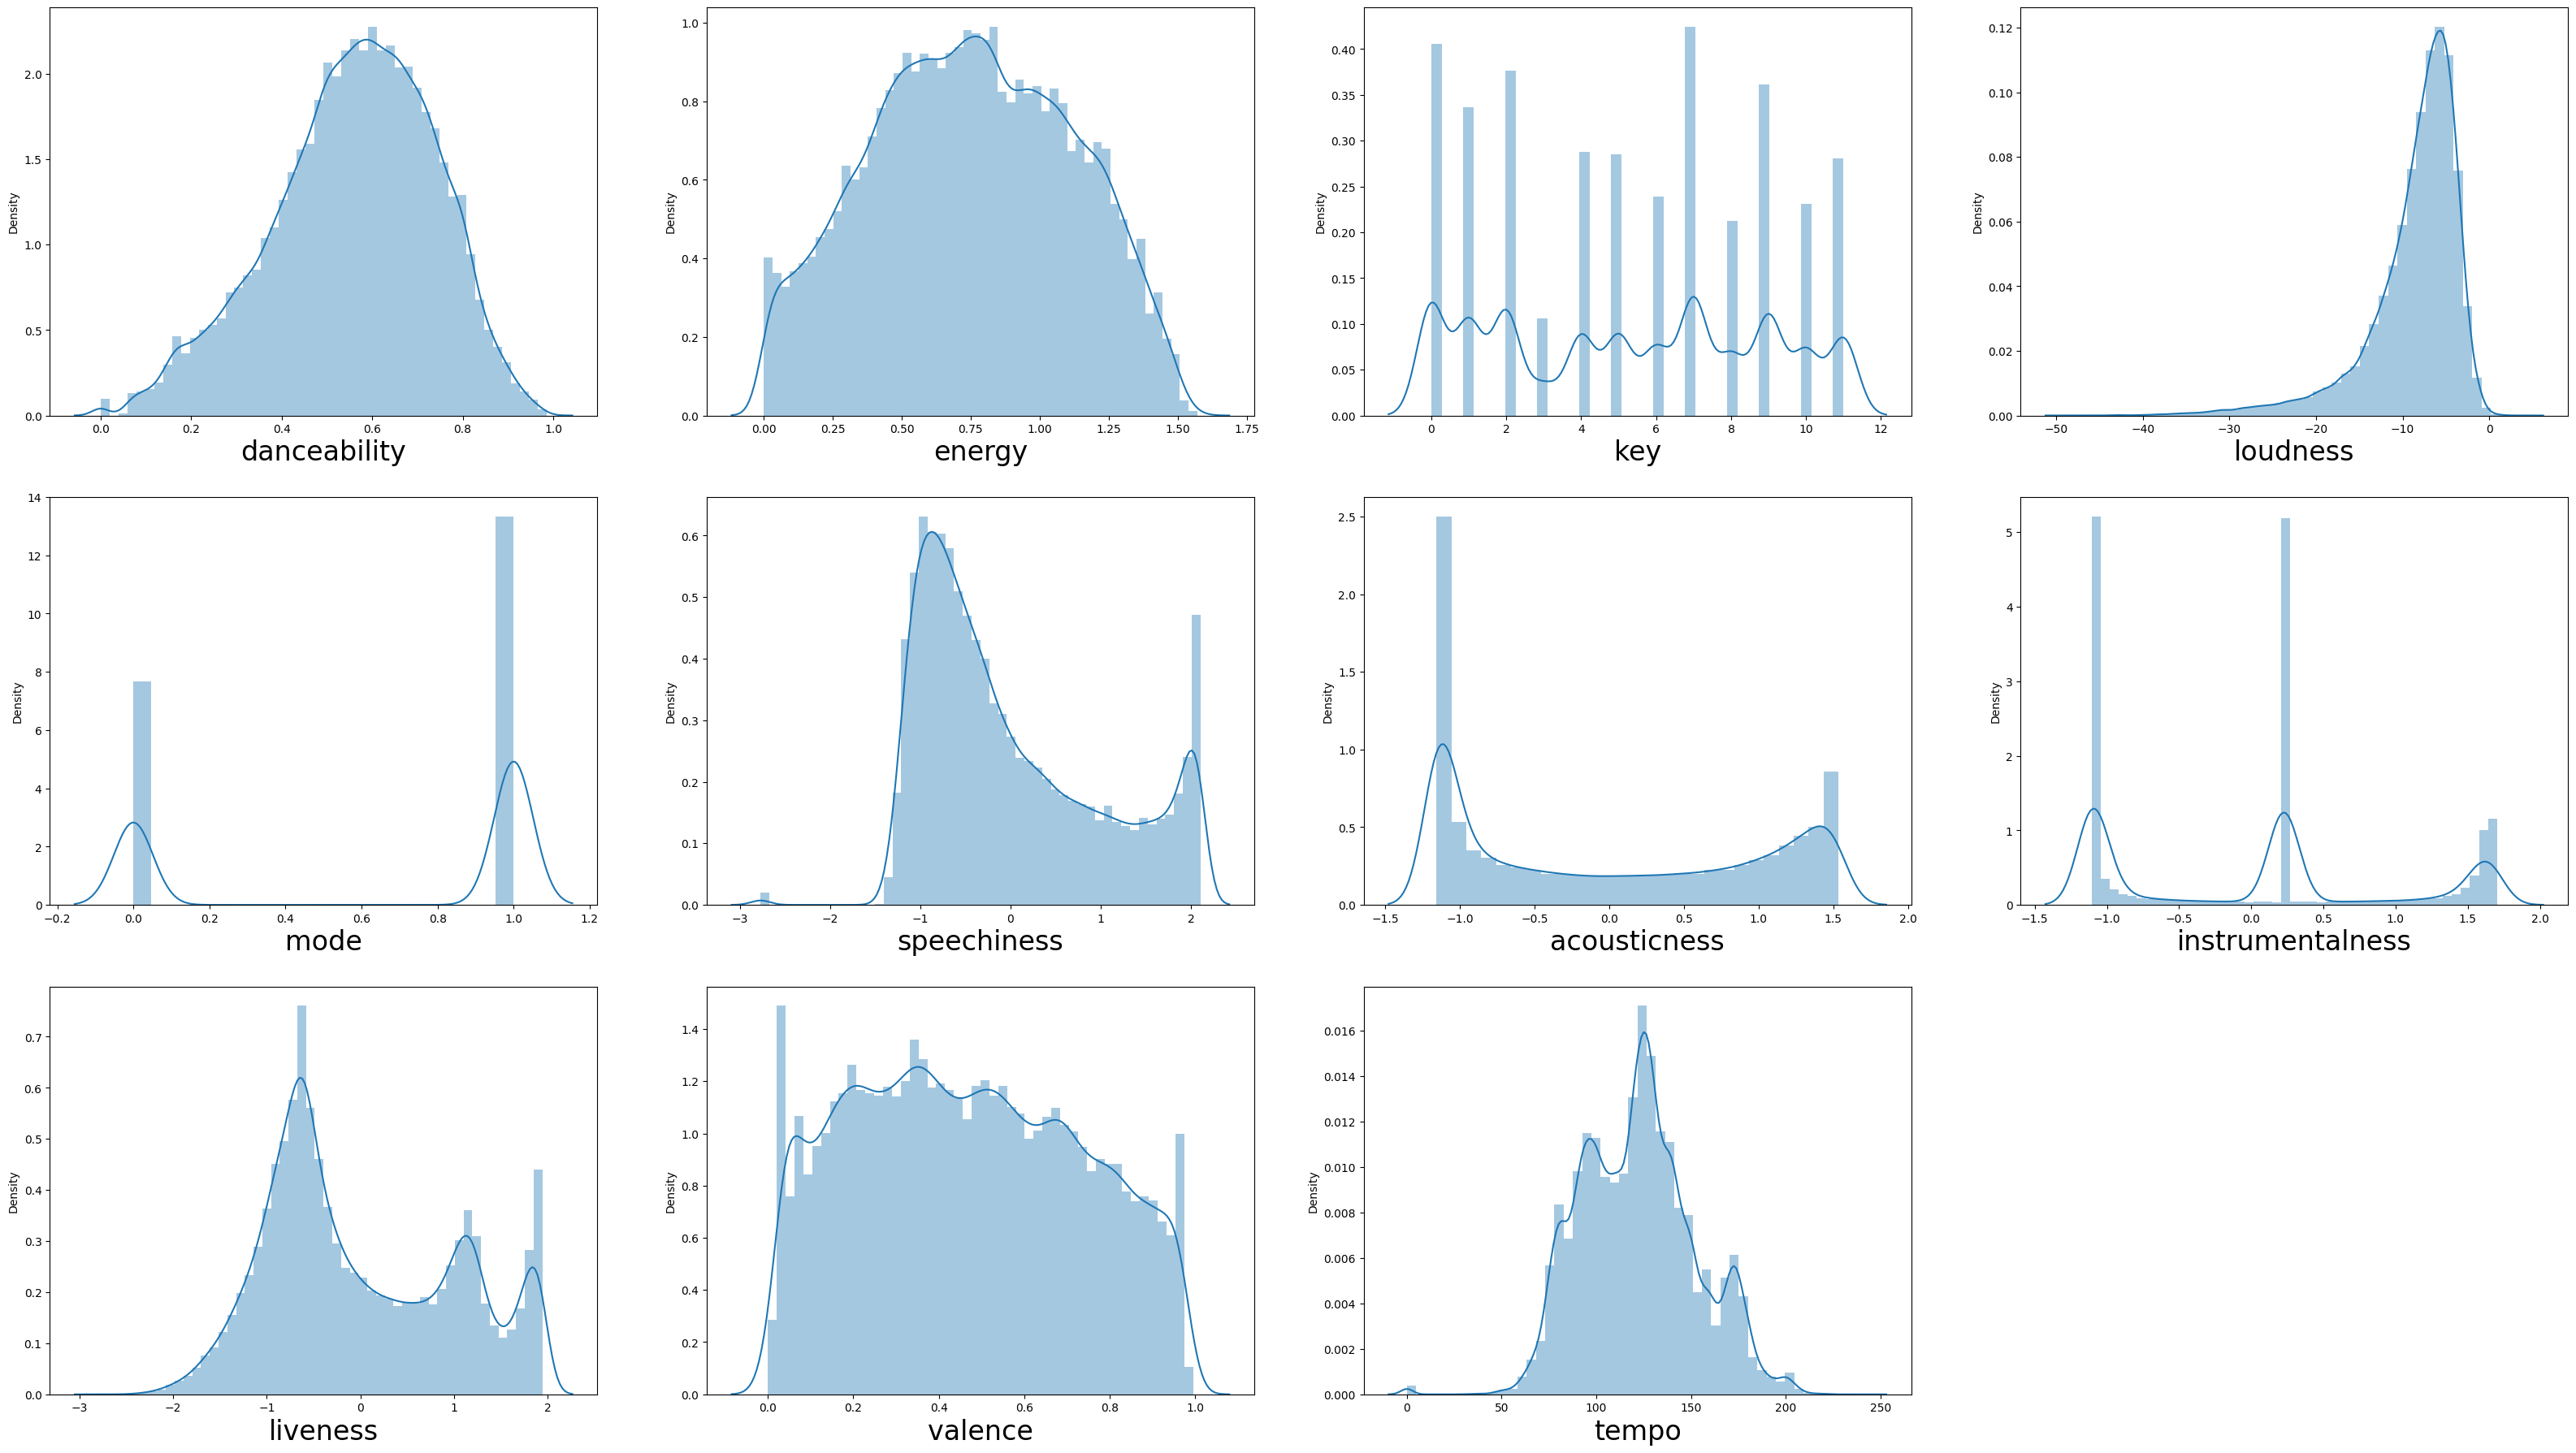

In [21]:
k=0
plt.figure(figsize = (40,30))
for i in x.columns:
    plt.subplot(4,4, k + 1)
    sns.distplot(x[i])
    plt.xlabel(i, fontsize=24)
    k +=1

***For other genres***

***Further categorizing them in a more generalized manner so that out model gets trained efficiently***

In [22]:
subgenre_categories = {
    'black-metal': 'rock',
    'grunge': 'rock',
    'hard-rock': 'rock',
    'heavy-metal': 'rock',
    'punk-rock': 'rock',
    'rock-n-roll': 'rock',
    'alt-rock': 'rock',
    'death-metal': 'rock',
    'psych-rock': 'rock',
    'hardcore': 'rock',
    'j-rock': 'rock',
    'rockabilly': 'rock',
    'gothic': 'rock',
    'goth': 'rock',
    'indie-pop': 'pop',
    'power-pop': 'pop',
    'r-n-b': 'pop',
    'synth-pop': 'pop',
    'electronic': 'pop',
    'electro': 'pop',
    'edm': 'pop',
    'disco': 'pop',
    'hip-hop': 'pop',
    'pop': 'pop',
    'pop-film': 'pop',
    'progressive-house': 'pop',
    'j-idol': 'pop',
    'j-pop': 'pop',
    'k-pop': 'pop',
    'afrobeat': 'cultural',
    'anime': 'cultural',
    'brazilian': 'cultural',
    'british': 'cultural',
    'french': 'cultural',
    'german': 'cultural',
    'indian': 'cultural',
    'iranian': 'cultural',
    'latin': 'cultural',
    'latino': 'cultural',
    'malay': 'cultural',
    'mandopop': 'cultural',
    'spanish': 'cultural',
    'swedish': 'cultural',
    'turkish': 'cultural',
    'world-music': 'cultural',
    'brazil': 'cultural',
    'sertanejo': 'cultural',
    'salsa': 'cultural',
    'samba': 'cultural',
    'forro': 'cultural',
    'tango': 'cultural',
    'classical': 'jazz',
    'jazz': 'jazz',
    'opera': 'jazz',
    'blues': 'jazz',
    'honky-tonk': 'jazz',
    'chicago-house': 'dance',
    'dancehall': 'dance',
    'deep-house': 'dance',
    'detroit-techno': 'dance',
    'drum-and-bass': 'dance',
    'dub': 'dance',
    'techno': 'dance',
    'trance': 'dance',
    'club': 'dance',
    'dance-metal': 'dance',
    'hardstyle': 'dance',
    'j-dance': 'dance',
    'bluegrass': 'country',
    'country': 'country',
    'folk': 'country',
    'gospel': 'country',
    'acoustic': 'ambient',
    'ambient': 'ambient',
    'chill': 'ambient',
    'children': 'ambient',
    'comedy': 'ambient',
    'disney': 'ambient',
    'emo': 'ambient',
    'funk': 'ambient',
    'garage': 'ambient',
    'groove': 'ambient',
    'guitar': 'ambient',
    'happy': 'ambient',
    'new-age': 'ambient',
    'romance': 'ambient',
    'sad': 'ambient',
    'show-tunes': 'ambient',
    'singer-songwriter': 'ambient',
    'ska': 'ambient',
    'sleep': 'ambient',
    'study': 'ambient',
    'trip-hop': 'ambient',
    'kids': 'ambient',
    'breakbeat': 'others',
    'cantopop': 'others',
    'party': 'others',
    'piano': 'others',
    'grindcore': 'others',
    'idm': 'others',
    'industrial': 'others',
    'metalcore': 'others',
    'minimal-techno': 'others',
    'mpb': 'others',
    'opere': 'others',
    'pagode': 'others'
}


# Replacing values in the "Genre" column with their categories
df['genre'] = df['genre'].replace(subgenre_categories)

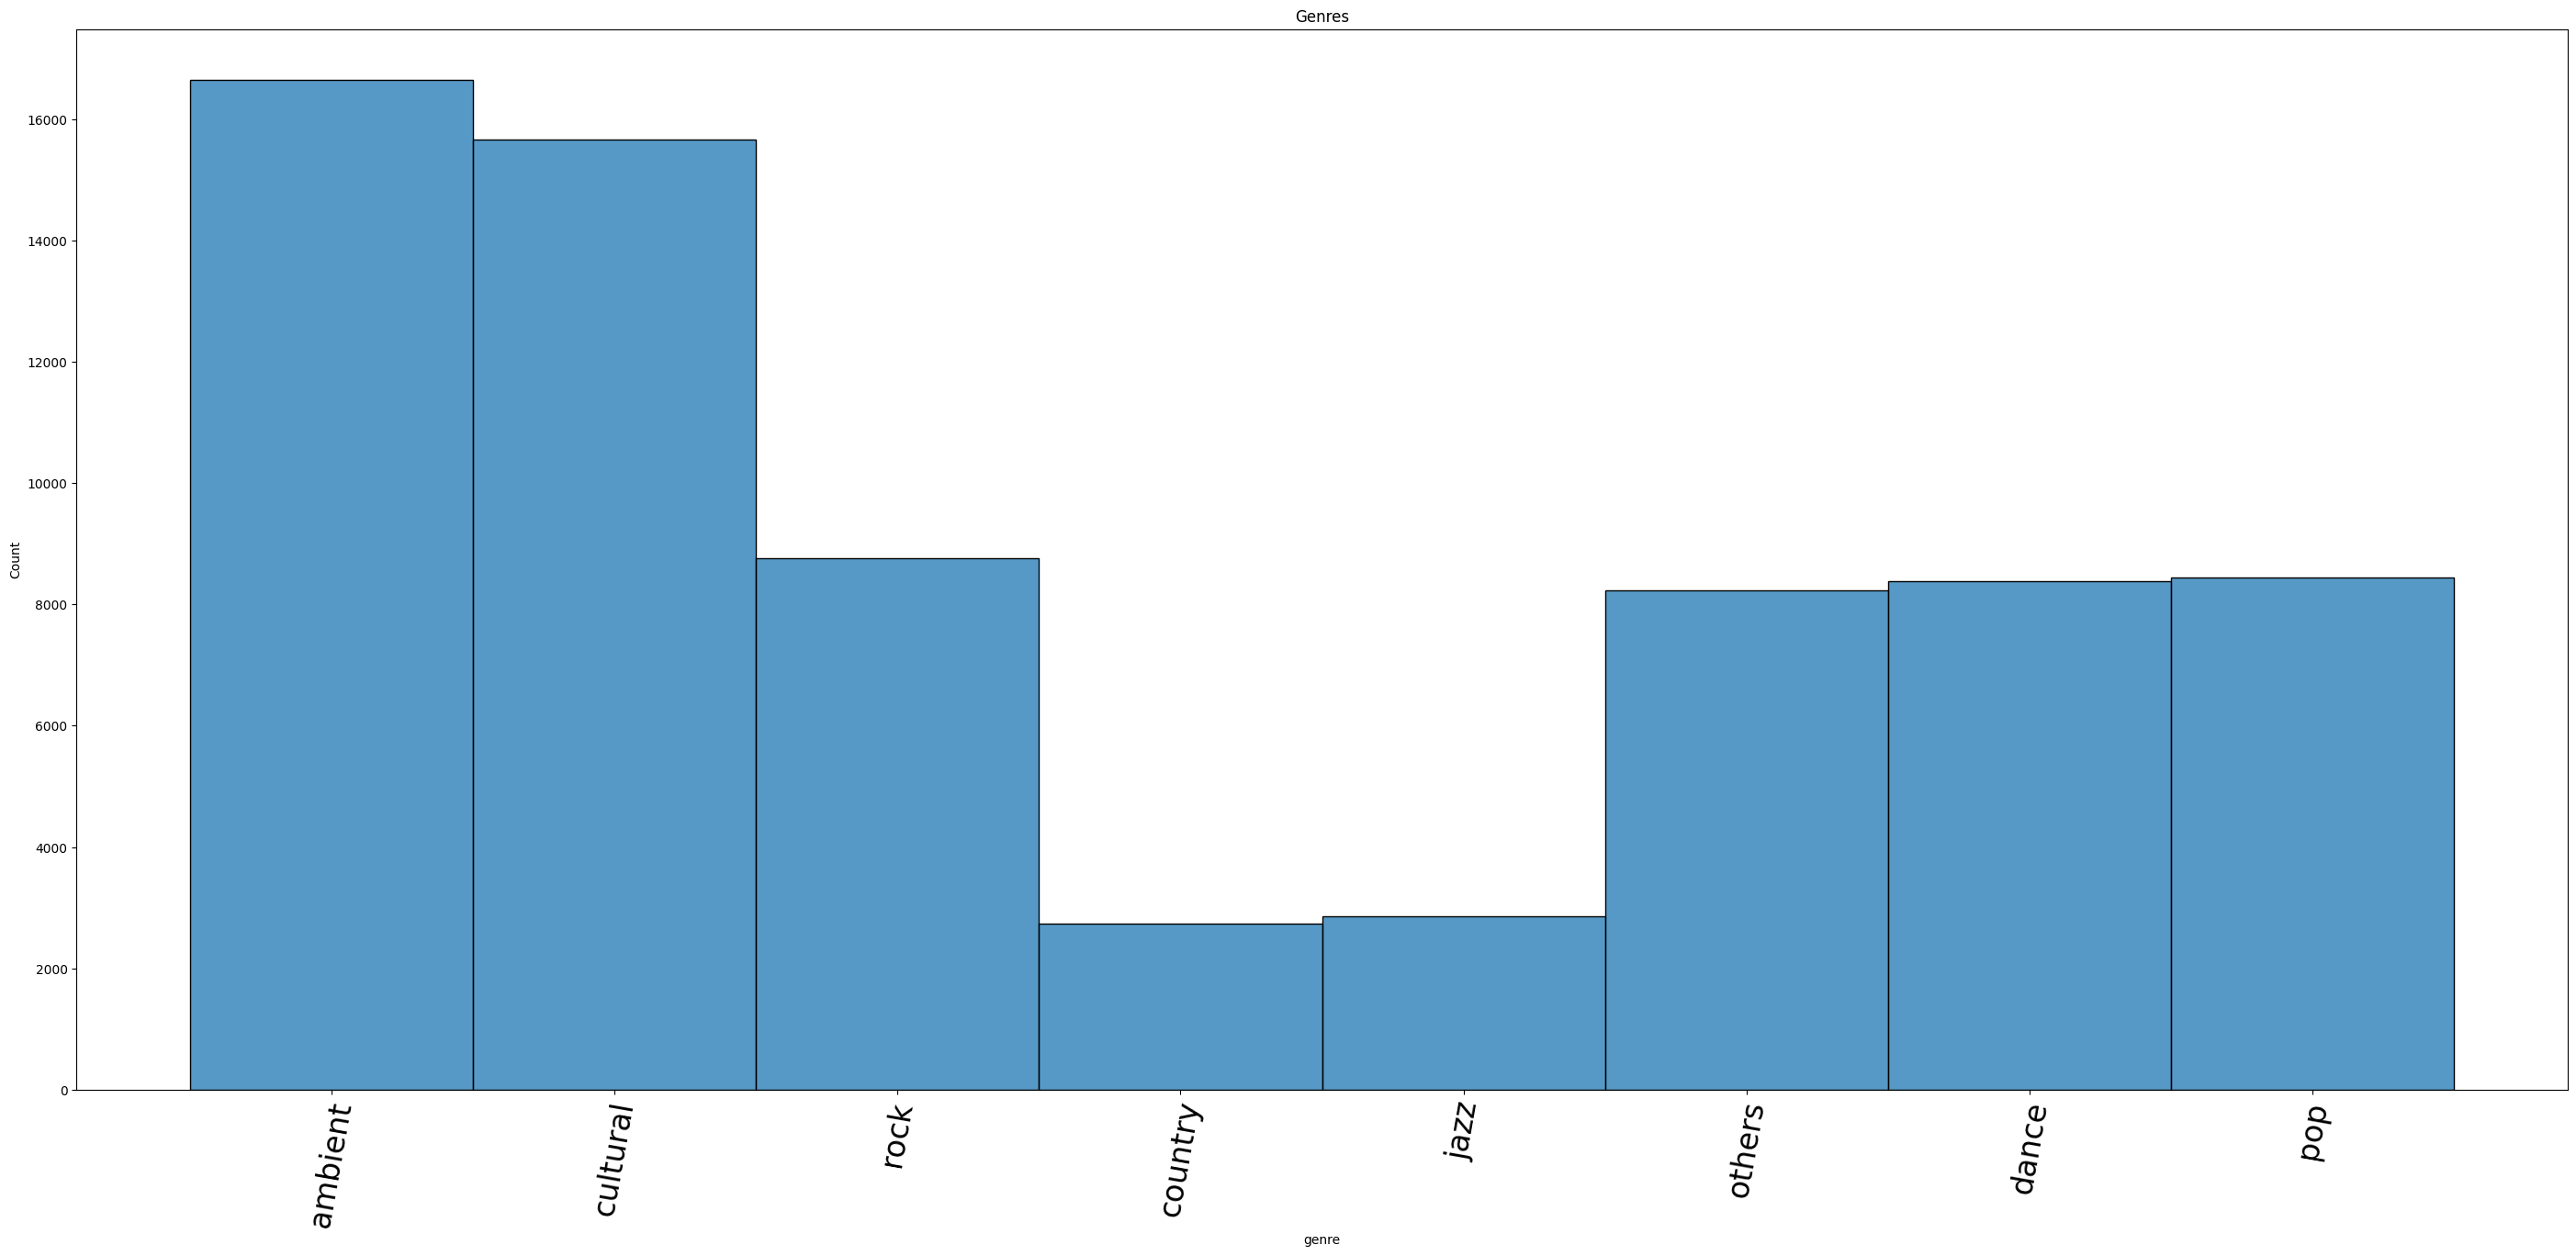

In [23]:
plt.figure(figsize=(35, 15))  # Set the figure size as needed
ax = sns.histplot(df["genre"])
plt.xticks(rotation=80, fontsize=24)
plt.title("Genres")
plt.show()

***The data is quite unbalanced, so doing some oversampling to balance the data.***

In [24]:
#-----------rock column-----------
rows_to_duplicate = []
for i in range(len(df)):
    if df.iloc[i]['genre'] == 'rock':
        rows_to_duplicate.append(i)

# Giving the number of times to duplicate the rows
oversampling_factor = 2  

# Duplicating rows of 'rock' genre
rows_duplicated = rows_to_duplicate * (oversampling_factor - 1)

# Concatenating the duplicated rows with the original DataFrame
df_oversampled = pd.concat([df, df.iloc[rows_duplicated]], ignore_index=True)


#-----------country column-----------
rows_to_duplicate = []
for i in range(len(df_oversampled)):
    if df_oversampled.iloc[i]['genre'] == 'country':
        rows_to_duplicate.append(i)

# Giving the number of times to duplicate the rows
oversampling_factor = 6

# Duplicating rows of 'country' genre
rows_duplicated = rows_to_duplicate * (oversampling_factor - 1)

# Concatenating the duplicated rows with the original DataFrame
df_oversampled1 = pd.concat([df_oversampled, df_oversampled.iloc[rows_duplicated]], ignore_index=True)


#-----------jazz column-----------
rows_to_duplicate = []
for i in range(len(df_oversampled1)):
    if df_oversampled1.iloc[i]['genre'] == 'jazz':
        rows_to_duplicate.append(i)

# Giving the number of times to duplicate the rows
oversampling_factor = 6

# Duplicating rows of 'jazz' genre
rows_duplicated = rows_to_duplicate * (oversampling_factor - 1)

# Concatenating the duplicated rows with the original DataFrame
df_oversampled2 = pd.concat([df_oversampled1, df_oversampled1.iloc[rows_duplicated]], ignore_index=True)


#-----------others column-----------
rows_to_duplicate = []
for i in range(len(df_oversampled2)):
    if df_oversampled2.iloc[i]['genre'] == 'others':
        rows_to_duplicate.append(i)

# Giving the number of times to duplicate the rows
oversampling_factor = 2

# Duplicating rows of 'others' genre
rows_duplicated = rows_to_duplicate * (oversampling_factor - 1)

# Concatenating the duplicated rows with the original DataFrame
df_oversampled3 = pd.concat([df_oversampled2, df_oversampled2.iloc[rows_duplicated]], ignore_index=True)


#-----------dance column-----------
rows_to_duplicate = []
for i in range(len(df_oversampled3)):
    if df_oversampled3.iloc[i]['genre'] == 'dance':
        rows_to_duplicate.append(i)

# Giving the number of times to duplicate the rows
oversampling_factor = 2

# Duplicating rows of 'dance' genre
rows_duplicated = rows_to_duplicate * (oversampling_factor - 1)

# Concatenating the duplicated rows with the original DataFrame
df_oversampled4 = pd.concat([df_oversampled3, df_oversampled3.iloc[rows_duplicated]], ignore_index=True)


#-----------pop column-----------
rows_to_duplicate = []
for i in range(len(df_oversampled4)):
    if df_oversampled4.iloc[i]['genre'] == 'pop':
        rows_to_duplicate.append(i)

# Giving the number of times to duplicate the rows
oversampling_factor = 2

# Duplicating rows of 'pop' genre
rows_duplicated = rows_to_duplicate * (oversampling_factor - 1)

# Concatenating the duplicated rows with the original DataFrame
df_oversampled5 = pd.concat([df_oversampled4, df_oversampled4.iloc[rows_duplicated]], ignore_index=True)


In [25]:
df_oversampled5.shape

(133498, 12)

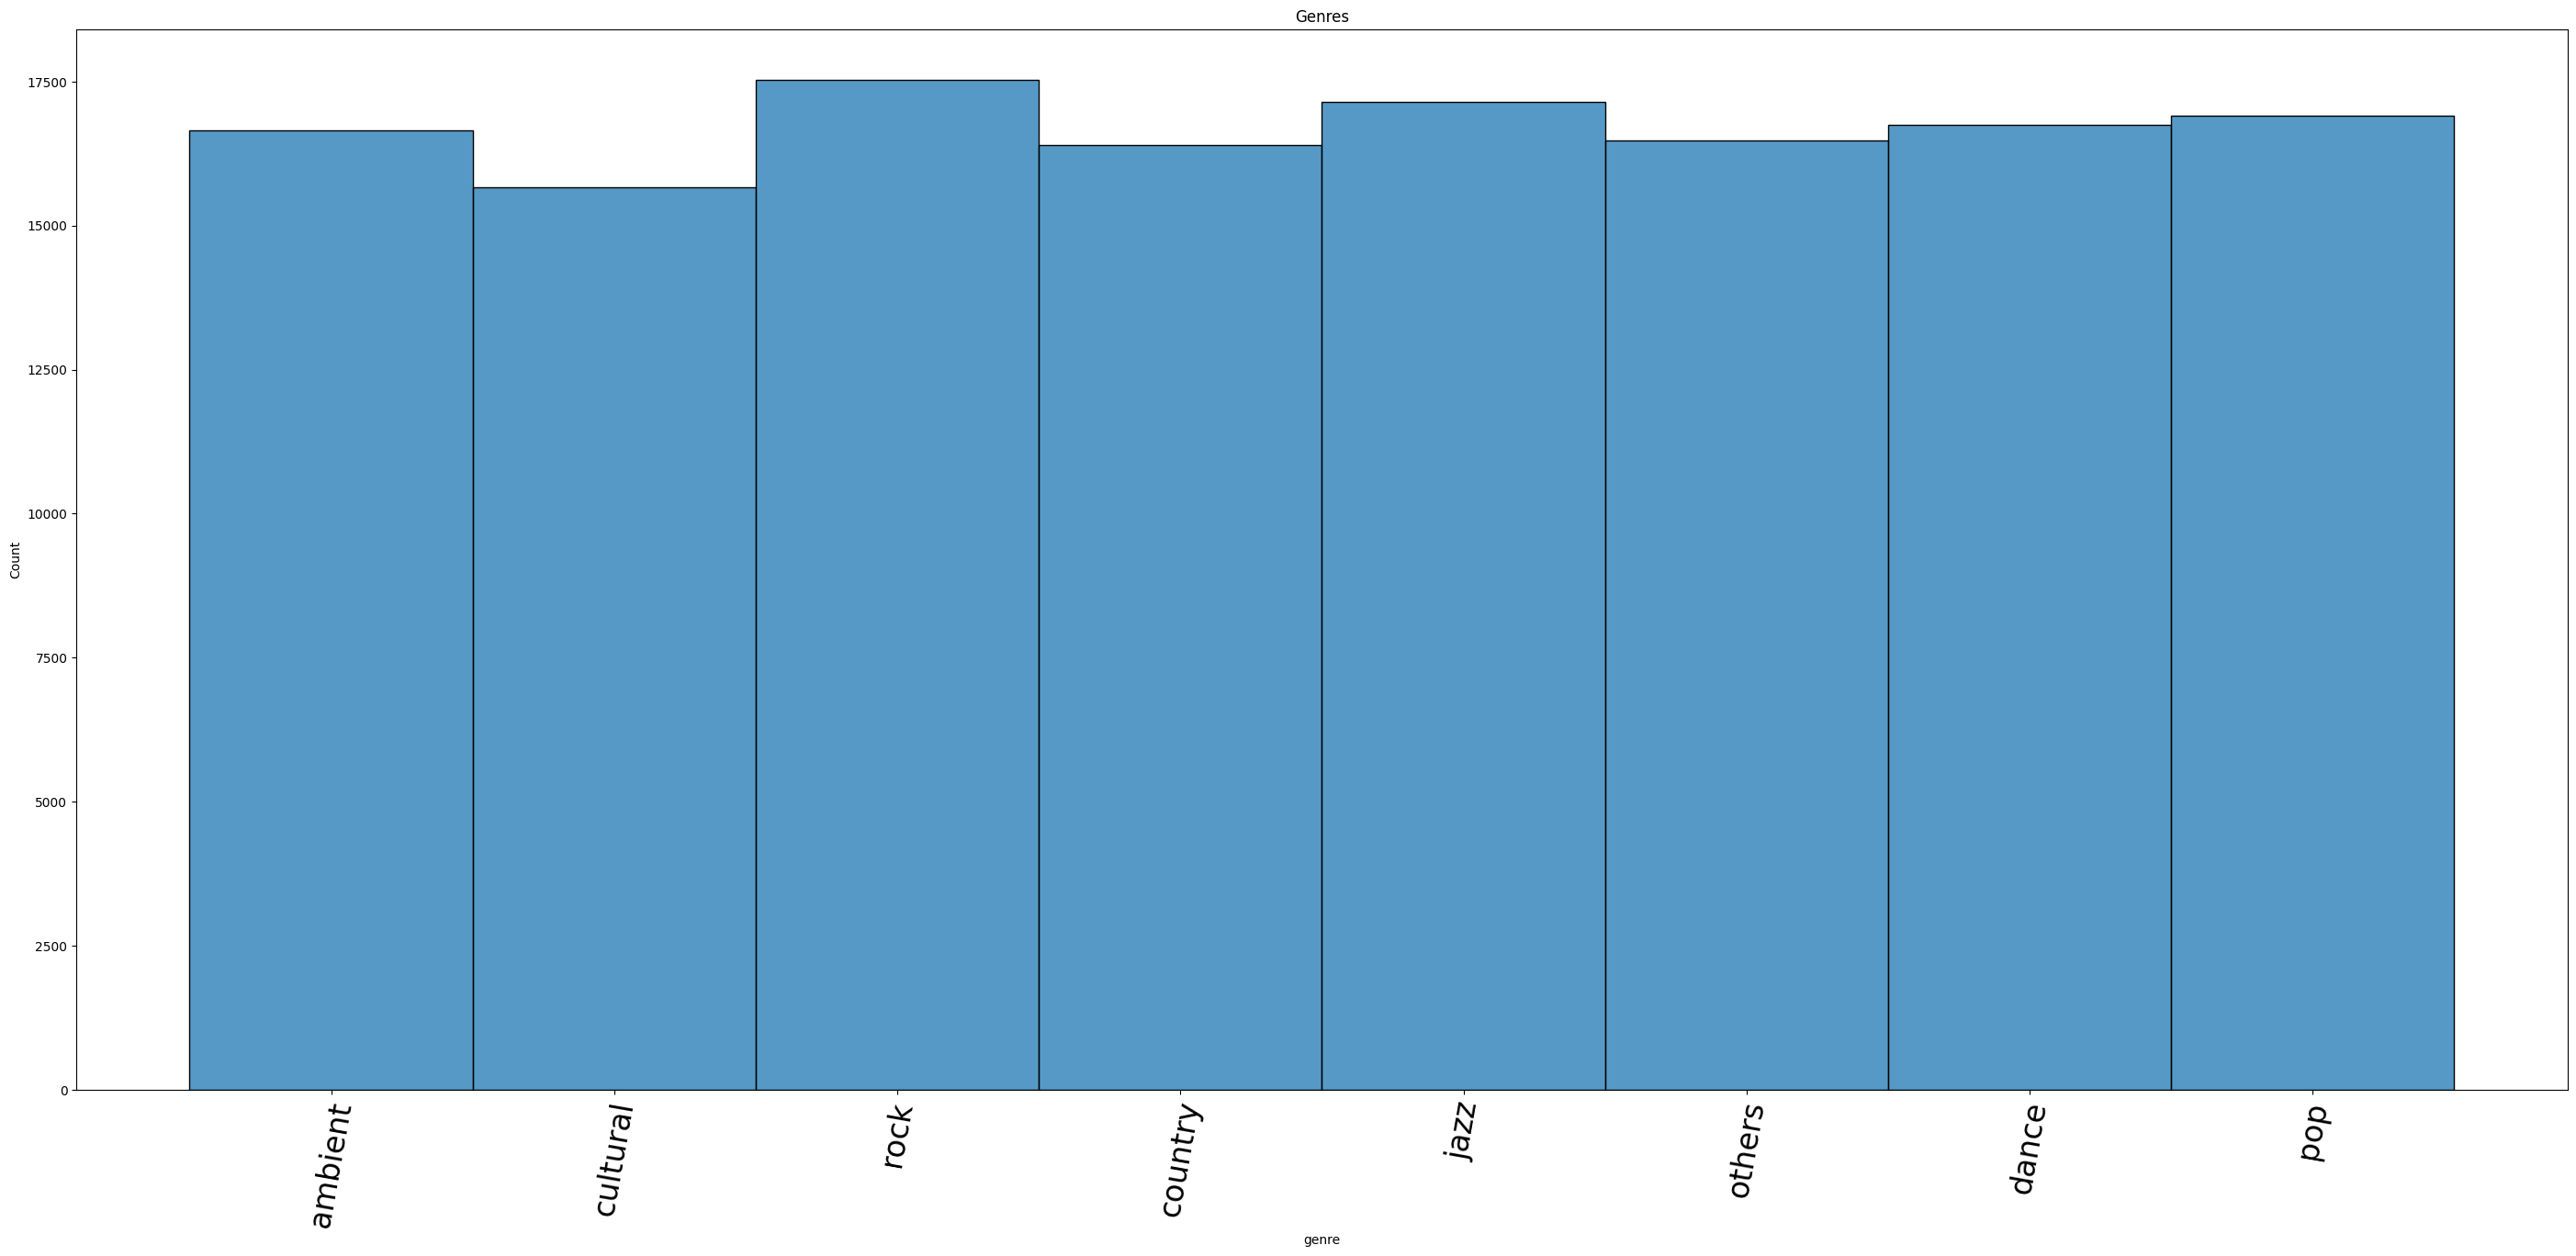

In [26]:
plt.figure(figsize=(35, 15))  # Set the figure size as needed
ax = sns.histplot(df_oversampled5["genre"])
plt.xticks(rotation=80, fontsize=24)
plt.title("Genres")
plt.show()

***Model Building***

***Scaling the data x, and encoding our target variable y***

In [27]:
x = df_oversampled5.loc[:,:"tempo"]
y = df_oversampled5["genre"]

scaler = RobustScaler()
x = scaler.fit_transform(x)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.1, random_state=42, shuffle = True)

***Logistic Regression***

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Creating Logistic Regression model
logistic = LogisticRegression()

# hyperparameters for tuning
params = {
    'C': [0.01, 0.1, 1, 10], 
    'penalty': [None,'l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'class_weight': [None, 'balanced']
}

# Applying GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logistic, params, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)

# Best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Using the best model for prediction
best_model = grid_search.best_estimator_
ypred1 = best_model.predict(xtest)

# Evaluating the model
score1 = accuracy_score(ytest, ypred1)
print("Accuracy Score:", score1)
print("")
print("Classification Report:")
print(metrics.classification_report(ytest, ypred1))

Best Hyperparameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
Accuracy Score: 0.35842696629213483

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.25      0.29      1663
           1       0.33      0.44      0.37      1622
           2       0.25      0.08      0.12      1571
           3       0.41      0.54      0.47      1703
           4       0.43      0.61      0.51      1685
           5       0.27      0.11      0.15      1661
           6       0.27      0.26      0.26      1692
           7       0.38      0.56      0.45      1753

    accuracy                           0.36     13350
   macro avg       0.33      0.35      0.33     13350
weighted avg       0.34      0.36      0.33     13350



***KNN Classifier***

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Creating KNN model
knn = KNeighborsClassifier()

# hyperparameters for tuning
params = {
    'n_neighbors': [3, 5, 7, 9], 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Applying GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)

# Best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Using the best model for prediction
best_model = grid_search.best_estimator_
ypred2 = best_model.predict(xtest)

# Evaluating the model
score2 = accuracy_score(ytest, ypred2)
print("Accuracy Score:", score2)
print("")
print("Classification Report:")
print(metrics.classification_report(ytest, ypred2))

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy Score: 0.7916104868913858

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.32      0.44      1663
           1       0.87      1.00      0.93      1622
           2       0.58      0.22      0.32      1571
           3       0.81      0.94      0.87      1703
           4       0.87      1.00      0.93      1685
           5       0.77      0.93      0.84      1661
           6       0.75      0.92      0.83      1692
           7       0.79      0.95      0.86      1753

    accuracy                           0.79     13350
   macro avg       0.77      0.79      0.75     13350
weighted avg       0.77      0.79      0.76     13350



***Support Vector Classifier (SVC)***

In [30]:
from sklearn.svm import SVC

# Creating SVC model
svc = SVC()
svc.fit(xtrain, ytrain)
ypred3 = svc.predict(xtest)

# Evaluating the model
score3 = accuracy_score(ytest, ypred3)
print("Accuracy Score:", score3)
print("")
print("Classification Report:")
print(metrics.classification_report(ytest, ypred3))

Accuracy Score: 0.4293632958801498

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.30      0.38      1663
           1       0.36      0.58      0.45      1622
           2       0.35      0.19      0.25      1571
           3       0.47      0.64      0.54      1703
           4       0.53      0.65      0.59      1685
           5       0.50      0.17      0.26      1661
           6       0.31      0.33      0.32      1692
           7       0.44      0.55      0.49      1753

    accuracy                           0.43     13350
   macro avg       0.43      0.43      0.41     13350
weighted avg       0.43      0.43      0.41     13350



***Decision Tree Classifier***

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Creating Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier()

# hyperparameters for tuning
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 7, 10, 15, 20]
}

# Applying GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, params, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)

# Best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Using the best model for prediction
best_model = grid_search.best_estimator_
ypred4 = best_model.predict(xtest)

# Evaluating the model
score4 = accuracy_score(ytest, ypred4)
print("Accuracy Score:", score4)
print("")
print("Classification Report:")
print(metrics.classification_report(ytest, ypred4))

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy Score: 0.39445692883895134

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.29      0.33      1663
           1       0.34      0.58      0.43      1622
           2       0.24      0.19      0.21      1571
           3       0.43      0.59      0.50      1703
           4       0.59      0.55      0.57      1685
           5       0.46      0.18      0.26      1661
           6       0.27      0.27      0.27      1692
           7       0.47      0.48      0.48      1753

    accuracy                           0.39     13350
   macro avg       0.40      0.39      0.38     13350
weighted avg       0.40      0.39      0.38     13350



***Random Forest Classifier***

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Creating Random Forest Classifier model
rf_classifier = RandomForestClassifier()

# Hyperparameters for tuning (reduce the range)
params = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Applying RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(rf_classifier, params, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(xtrain, ytrain)

# Best hyperparameters from the random search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Using the best model for prediction
best_model = random_search.best_estimator_
ypred5 = best_model.predict(xtest)

# Evaluating the model
score5 = accuracy_score(ytest, ypred5)
print("Accuracy Score:", score5)
print("")
print("Classification Report:")
print(classification_report(ytest, ypred5))


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Accuracy Score: 0.8414232209737827

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.48      0.58      1663
           1       0.94      1.00      0.97      1622
           2       0.63      0.45      0.52      1571
           3       0.84      0.95      0.89      1703
           4       0.94      1.00      0.97      1685
           5       0.92      0.93      0.92      1661
           6       0.82      0.92      0.87      1692
           7       0.82      0.97      0.89      1753

    accuracy                           0.84     13350
   macro avg       0.83      0.84      0.83     13350
weighted avg       0.83      0.84      0.83     13350



***Neural Networks***

In [35]:
import tensorflow as tf
from tensorflow import keras

early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights = True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 10, restore_best_weights = True)

model = keras.Sequential([
    keras.layers.Input(name = "input", shape = (xtrain.shape[1])),
    keras.layers.Dense(1024, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(512, activation = "relu"),
    keras.layers.Dense(512, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(512, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dense(max(ytrain)+1, activation = "softmax")
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              12288     
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                     

In [36]:
model.compile(optimizer = keras.optimizers.Adam(),
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

model_history = model.fit(xtrain, ytrain,
                epochs = 100,
                verbose = 1, batch_size = 128,
                validation_data = (xtest, ytest),
                callbacks = [early_stopping1, early_stopping2])

Epoch 1/100


939/939 [==============================] - 41s 30ms/step - loss: 1.6730 - accuracy: 0.3774 - val_loss: 1.5866 - val_accuracy: 0.4011
Epoch 2/100
939/939 [==============================] - 51s 54ms/step - loss: 1.5673 - accuracy: 0.4109 - val_loss: 1.5654 - val_accuracy: 0.4142
Epoch 3/100
939/939 [==============================] - 29s 31ms/step - loss: 1.5302 - accuracy: 0.4248 - val_loss: 1.5274 - val_accuracy: 0.4245
Epoch 4/100
939/939 [==============================] - 32s 34ms/step - loss: 1.5060 - accuracy: 0.4340 - val_loss: 1.5063 - val_accuracy: 0.4355
Epoch 5/100
939/939 [==============================] - 40s 42ms/step - loss: 1.4803 - accuracy: 0.4444 - val_loss: 1.4852 - val_accuracy: 0.4444
Epoch 6/100
939/939 [==============================] - 36s 38ms/step - loss: 1.4501 - accuracy: 0.4558 - val_loss: 1.4498 - val_accuracy: 0.4567
Epoch 7/100
939/939 [==============================] - 117s 124ms/step - loss: 1.4178 - accuracy: 0.4680 - val_loss: 1.4251 - va

In [37]:
print(model.evaluate(xtest, ytest))

418/418 [==============================] - 2s 4ms/step - loss: 0.7887 - accuracy: 0.7755
[0.7887219786643982, 0.7755056023597717]


In [38]:
# Evaluating the model
ypred6 = model.predict(xtest).argmax(axis=1)

score6 = accuracy_score(ytest, ypred6)
print("Accuracy Score:", score6)
print("")
print("Classification Report:")
print(metrics.classification_report(ytest, ypred6))

418/418 [==============================] - 2s 4ms/step
Accuracy Score: 0.775505617977528

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.41      0.49      1663
           1       0.90      1.00      0.94      1622
           2       0.53      0.36      0.43      1571
           3       0.77      0.89      0.83      1703
           4       0.90      0.99      0.94      1685
           5       0.78      0.81      0.79      1661
           6       0.77      0.83      0.80      1692
           7       0.77      0.89      0.83      1753

    accuracy                           0.78     13350
   macro avg       0.75      0.77      0.76     13350
weighted avg       0.76      0.78      0.76     13350



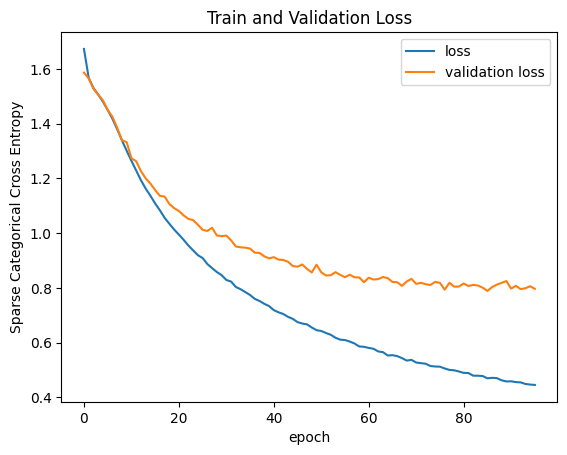

In [39]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.title("Train and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Sparse Categorical Cross Entropy")
plt.show()

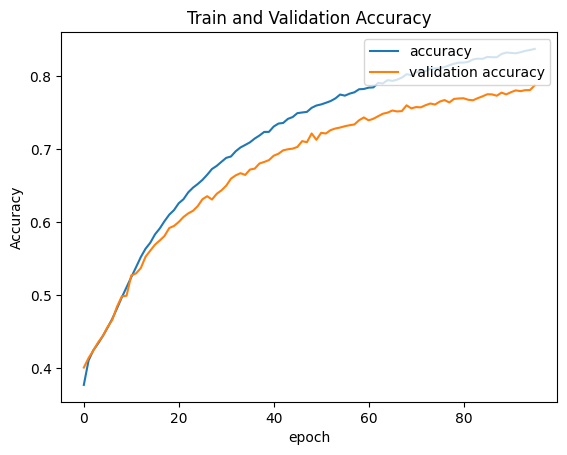

In [40]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.legend(["accuracy", "validation accuracy"], loc ="upper right")
plt.title("Train and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.show()

***Final Results***

In [41]:
final_results = pd.DataFrame(
    {
        'Model': ['Logistic Regression', 'KNN Classifier', 'SVC', 'Decision Tree Classifier', 'Random Forest Classifier', 'Neural Networks'],
        'Score': [score1, score2, score3, score4, score5, score6]
    }
)

# Sorted the DataFrame by 'Score' column in descending order
final_results = final_results.sort_values(by='Score', ascending=False)

# Displayed the sorted DataFrame with 'Score' as index
final_results = final_results.set_index('Score')
final_results

Model
Score                             
0.841423  Random Forest Classifier
0.791610            KNN Classifier
0.775506           Neural Networks
0.429363                       SVC
0.394457  Decision Tree Classifier
0.358427       Logistic Regression